Importing the necessary libraries and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
def add_entry(k, dictionary): #used to update the dictionaries
    """Either adds 1 to a given key:value pair or initializes a key:value pair"""
    if k in dictionary: #checks if there is already an entry
        dictionary[k] += 1
    else: #if not, it'll create a new entry
        dictionary[k] = 1

Reading in the data into a dataframe

In [3]:
df = pd.read_csv('PL17-18.csv')
#df = df.append(pd.read_csv('PL16-17.csv'), ignore_index = True)

Limiting the data in the dataframe to only the necessary data

In [4]:
df = df.loc[:, ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']]

Calculating the rating for each team and the difference for each match

In [11]:
df["HTRating"] = np.nan
df["ATRating"] = np.nan

teams = df.HomeTeam.unique() #the name of every team

for team in teams:
    games = df.loc[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].index #index's for each match
    goal_diff = np.empty(38, dtype=int) #array holding ratings for all matches
    team_ratings = np.empty(32, dtype=int) #array holding team rating for matches 7-38 inclusive
    
    #calculate the goal difference for each match played
    for index in range(len(games)):
        game = df.iloc[games[index]] #data of the currently selected game
        if (game['HomeTeam'] == team):
            goal_diff[index] = game.FTHG - game.FTAG
        else:
            goal_diff[index] = game.FTAG - game.FTHG
    
    #calculate the match rating
    for index in range(6, len(games)): #6 - 37 inclusive
        team_ratings[index - 6] = np.sum(goal_diff[index - 6: index])
    
    #insert the match rating into the df
    for num in range(6, len(games)): # 6 - 37 inclusive
        game = df.iloc[games[num]]
        if (game.HomeTeam == team):
            df.at[games[num], 'HTRating'] = team_ratings[num - 6]
        else:
            df.at[games[num], 'ATRating'] = team_ratings[num - 6]

df["MatchRating"] = df.HTRating - df.ATRating

In [12]:
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTRating,ATRating,MatchRating
0,11/08/2017,Arsenal,Leicester,4,3,H,NaN,NaN,NaN
1,12/08/2017,Brighton,Man City,0,2,A,NaN,NaN,NaN
2,12/08/2017,Chelsea,Burnley,2,3,A,NaN,NaN,NaN
3,12/08/2017,Crystal Palace,Huddersfield,0,3,A,NaN,NaN,NaN
4,12/08/2017,Everton,Stoke,1,0,H,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
375,13/05/2018,Newcastle,Chelsea,3,0,H,-2.0,4.0,-6.0
376,13/05/2018,Southampton,Man City,0,1,A,0.0,11.0,-11.0
377,13/05/2018,Swansea,Stoke,1,2,A,-8.0,-5.0,-3.0
378,13/05/2018,Tottenham,Leicester,5,4,H,1.0,-7.0,8.0


Creating a new dataframe of only the the result (H, D or A) and the match rating

In [7]:
df2 = df[['FTR', 'MatchRating']]

In [8]:
df2 = df2.drop(df2[np.isnan(df2.MatchRating)].index)

Creating a dataframe illustrating to compare the match rating and the final result

In [9]:
df3 = pd.DataFrame(columns=['MatchRating', 'Wins', 'Draws', 'Losses'])

In [10]:
df3.MatchRating = range(-25, 26)
df3.Wins = 0
df3.Draws = 0
df3.Losses = 0

In [11]:
wins = {}
draws = {}
losses = {}

for index in range(len(df2)):
    mr = df2.iloc[index]['MatchRating']
    result = df2.iloc[index]['FTR']
    if (result == 'H'):
        add_entry(mr, wins)
    elif (result == 'D'):
        add_entry(mr, draws)
    else:
        add_entry(mr, losses)

In [12]:
for i in range(51):
    if (wins.get(i - 25) is not None):
        df3.at[i, 'Wins'] = wins.get(i - 25)
    if (draws.get(i - 25) is not None):
        df3.at[i, 'Draws'] = draws.get(i - 25)
    if (losses.get(i - 25) is not None):
        df3.at[i, 'Losses'] = losses.get(i - 25)

In [13]:
df3['Win %'] = round((df3.Wins / (df3.Wins + df3.Draws + df3.Losses)), 2)
df3['Draw %'] = round((df3.Draws / (df3.Wins + df3.Draws + df3.Losses)), 2)
df3['Loss %'] = round((df3.Losses / (df3.Wins + df3.Draws + df3.Losses)), 2)

In [14]:
print(df3.to_string(index=False))

 MatchRating  Wins  Draws  Losses  Win %  Draw %  Loss %
         -25     0      0       1   0.00    0.00    1.00
         -24     0      0       0    NaN     NaN     NaN
         -23     0      0       0    NaN     NaN     NaN
         -22     0      0       0    NaN     NaN     NaN
         -21     1      0       0   1.00    0.00    0.00
         -20     1      0       0   1.00    0.00    0.00
         -19     3      0       0   1.00    0.00    0.00
         -18     0      0       2   0.00    0.00    1.00
         -17     1      0       1   0.50    0.00    0.50
         -16     0      0       1   0.00    0.00    1.00
         -15     0      1       3   0.00    0.25    0.75
         -14     1      2       3   0.17    0.33    0.50
         -13     1      3       3   0.14    0.43    0.43
         -12     2      2       7   0.18    0.18    0.64
         -11     2      3       6   0.18    0.27    0.55
         -10     3      2       3   0.38    0.25    0.38
          -9     2      3      

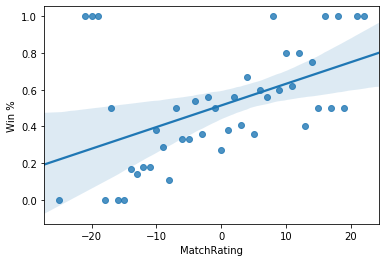

In [63]:
p = sns.regplot(x="MatchRating",
               y="Win %", 
               #y="Loss %",
               #y="Draw %",
               data=df3)

In [54]:
stats.linregress(df3.dropna()["MatchRating"], df3.dropna()["Win %"])

LinregressResult(slope=0.01179303491856475, intercept=0.5141190864347043, rvalue=0.49515021234089185, pvalue=0.0006328608559730981, stderr=0.003192915844584809)

In [64]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df3.dropna()["MatchRating"], df3.dropna()["Win %"])